**DESCRIPTION** : A machine learning program to identify when an article might be fake news

**Dataset Description**

 *train.csv*: A full training dataset with the following attributes:

    1. id: unique id for a news article
    2. title: the title of a news article
    3. author: author of the news article
    4. text: the text of the article; could be incomplete
    5. label: a label that marks the article as potentially unreliable
                1: unreliable
                0: reliable


**Importing the required libraries**

In [169]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import string
import matplotlib.pyplot as plt
import re #(regular expression - a library useful for searching word in a paragraph)
import nltk
from nltk.corpus import stopwords # stopword- words that doesn't add much value of the paragraph , like -'the' ,'with' ,'i',etc.
from nltk.stem import WordNetLemmatizer # returns the root of a word by removing its prefix and suffix
from sklearn.feature_extraction.text import TfidfVectorizer # to convert text into feature vector (i.e numbers)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
# printing the stopwords of English language
print(stopwords.words('english'))

**Data Pre-pocessing**

In [ ]:
#Loading training dataset to pandas framework
news_dataset = pd.read_csv('./dataset/train.csv')

In [ ]:
# size of dataset
news_dataset.shape


In [ ]:
# printing the first 5 rows of the dataframe
news_dataset.head()

In [ ]:
news_dataset.isnull().sum()

In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

Now Let’s explore the unique values in the each category using below code.

In [ ]:
sns.countplot(data=news_dataset,
              x='label',
              order=news_dataset['label'].value_counts().index)

In [ ]:
news_dataset.label[news_dataset.label == 'REAL'] = 1
news_dataset.label[news_dataset.label == 'FAKE'] = 0

In [ ]:
# Merging 'title' and 'author' column in a new column 'body'
news_dataset['body']=news_dataset['text']+' '+news_dataset['title']


In [ ]:
print(news_dataset['body'])

**Text Cleaning :**

Returning only the root word by removing its prefix and suffix.

For eg :
teacher,teaching --> teach

In this step we will clean the data that will be used for training. The cleaning will involve these steps- 1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more. 2.Remove all the numeric text, urls

In [128]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [150]:
for x in range(len(news_dataset)) :
    corpus = []
    review = news_dataset['body'][x]
    review = re.sub(r'https?://\S+|www\.\S+', '', review)  # Remove URLs
    review = re.sub(r'\W', ' ', review)  # Remove special characters
    review = re.sub(r'\n', ' ', review)  # Replace newline characters with a space
    review = re.sub(r'\w*\d\w*', '', review)  # Remove words containing digits
    review = review.lower()  # Convert to lowercase
    review = nltk.word_tokenize(review)  # Tokenize
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    news_dataset['body'][x] = review  

In [151]:
# Seperating the data and label
X =news_dataset['body'].values
Y =news_dataset['label'].astype('int').values


In [152]:
print(X)
print(Y)


['daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi exactly hillary people done coma patient waking watching hour cnn hospital bed would assume fbi director james comey hillary opponent election fbi attack everyone obama cnn hillary people circulated letter attacking comey currently medium hit piece lambasting targeting trump surprising clinton ally start running attack ad fbi fbi leadership warned entire left wing establishment form lynch mob continue going hillary fbi credibility attacked medium democrat preemptively head result investigation clinton foundation hillary clinton covert struggle fbi agent obama doj people gone explosively public new york time compared comey j edgar hoover bizarre headline james comey role recall hoover fbi fairly practically a

In [153]:
# Splitting the dataset to training and test data
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


**Note** : In the above cell

*stratify=Y* will make sure that random split has same proportion of 0 's and 1 's as that in original dataset

*random_state* is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced.

**What is a TfidfVectorizer?**

*TF (Term Frequency):* The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

*IDF (Inverse Document Frequency):* Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

Thus in TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.


In [154]:
# Converting the textual data to numerical data using TfidfVectorizer
vectorizer =TfidfVectorizer()
tfidf_X_train = vectorizer.fit_transform(X_train)
tfidf_X_test = vectorizer.transform(X_test)

In [155]:
# X after numerical vectorization
print(tfidf_X_train)

  (0, 14701)	0.044169434709975766
  (0, 11312)	0.04413035318403348
  (0, 21306)	0.05132613518056454
  (0, 45431)	0.022878146561402406
  (0, 50614)	0.042229188812258185
  (0, 6126)	0.044855041516554846
  (0, 18918)	0.044247999515528616
  (0, 36185)	0.04136969881307987
  (0, 24915)	0.03016912512969041
  (0, 27872)	0.031069934505999368
  (0, 26631)	0.05745658233364052
  (0, 41100)	0.02451957287776333
  (0, 15445)	0.035833798227060294
  (0, 7409)	0.027556562424137208
  (0, 37501)	0.0295507755989094
  (0, 14588)	0.06759875256729546
  (0, 37489)	0.040772146168219864
  (0, 27220)	0.07901107791821595
  (0, 36077)	0.05770868955380217
  (0, 43070)	0.03426198568820103
  (0, 13619)	0.06255232798029543
  (0, 25854)	0.0682189261287343
  (0, 26014)	0.022334536414188085
  (0, 11945)	0.05314311808097138
  (0, 5964)	0.03935018105232712
  :	:
  (5067, 3104)	0.07737931725780448
  (5067, 3862)	0.07965544633134945
  (5067, 35420)	0.08728886734532162
  (5067, 46652)	0.057410744494672775
  (5067, 49548)	0.044

**Model Training : Decision Tree Classifier**

In [156]:
decision_model = DecisionTreeClassifier()
#training the model
decision_model.fit(tfidf_X_train,Y_train)

DecisionTreeClassifier()

**Evaluation and Prediction**


In [157]:
# Predict testing data
Y_test_pred = decision_model.predict(tfidf_X_test)
# accuracy score of test data
test_accuracy = accuracy_score(Y_test_pred,Y_test)

In [158]:
print('Accuracy score of test data :',test_accuracy)

Accuracy score of test data : 0.8105761641673244


The confusion matrix for Decision Tree Classifier can be implemented with the code below.

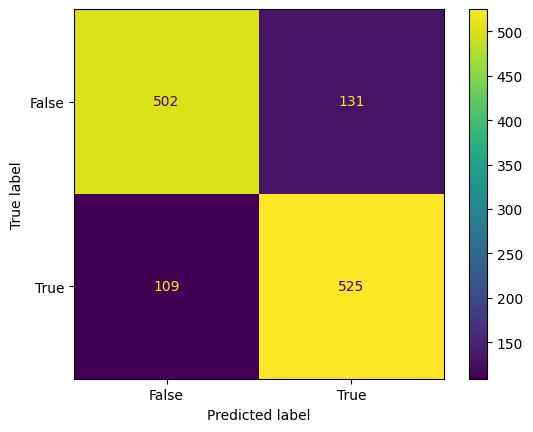

In [159]:
# Confusion matrix of Results from Decision Tree classification
cm = metrics.confusion_matrix(Y_test, Y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
cm_display.plot()
plt.show()

**Model Training : Passive Aggressive Classifier**

In [160]:
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(tfidf_X_train,Y_train)


PassiveAggressiveClassifier()

**Evaluation and Prediction**


In [161]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 92.82%


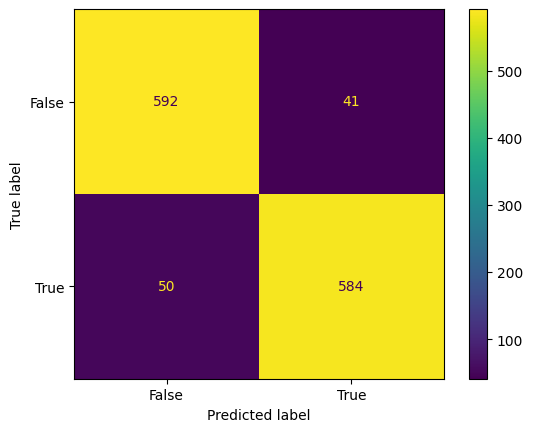

In [162]:
# Confusion matrix of Results from Passive Aggresive classification
cm = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
cm_display.plot()
plt.show()

**Model Training : XGBoost**

In [171]:
xgb_model = XGBClassifier(
    learning_rate=0.001,         # Step size at each boosting iteration
    n_estimators=1000,           # Number of boosting rounds (trees)
    max_depth=10,                # Maximum depth of each decision tree
    min_child_weight=1,          # Minimum sum of instance weight needed in a child
    subsample=0.8,               # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,        # Fraction of features used for fitting each tree
    objective='binary:logistic', # Objective function for binary classification
    seed=42,                     # Random seed for reproducibility
    gamma=0.01,                  # Minimum loss reduction required to make a further partition
    reg_lambda=0.1               # L2 regularization term on weights
)

xgb_model.fit(tfidf_X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [173]:
# make predictions for test data
Y_pred_xgb = xgb_model.predict(tfidf_X_test)
predictions = [round(value) for value in Y_pred_xgb]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.66%


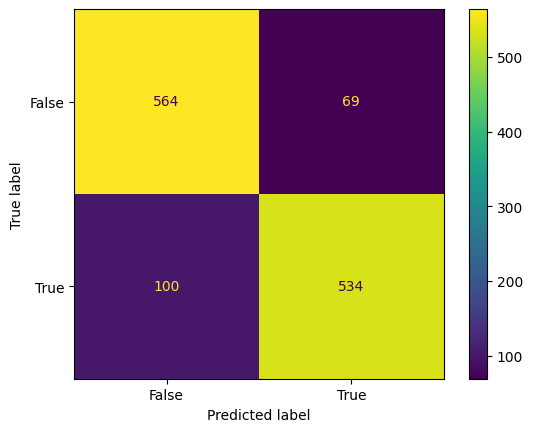

In [175]:
# Confusion matrix of Results from Passive Aggresive classification
cm = metrics.confusion_matrix(Y_test, Y_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
cm_display.plot()
plt.show()


**Evaluation and Prediction**


**Making a predictive system**

In [164]:
def fake_news_detector(news):
    input_data=[news]
    #vectorization
    vectorized_input_data=vectorizer.transform(input_data)
    #predicton
    prediction = classifier.predict(vectorized_input_data)
    # print(prediction)
    if(prediction[0]==0):
        print("Looks like a FAKE News")
    else:
        print("Looks like a REAL News")


**Testing on random examples**

In [166]:
fake_news_detector("Go to Article President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

Looks like a FAKE News


In [165]:
fake_news_detector('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

Looks like a REAL News


In [167]:
fake_news_detector("Iranian negotiators reportedly have made a last-ditch push for more concessions from the U.S. and five other world powers as talks on the fate of Iran's nuclear program come down to the final days before a crucial deadline.The New York Times reported late Sunday that Tehran had backed away from a tentative promise to ship a large portion of its uranium stockpile to Russia, where it could not be used as part of any future weapons program. Western officials insisted to the paper that the uranium did not have to be sent overseas, but could be disposed of in other ways.The new twist in the talks comes just two days before the deadline for both sides to agree on a framework for a permanent deal. The final deadline for a permanent deal would not arrive until the end of June.However, if Iran insists on keeping its uranium in the country, it would undermine a key argument made in favor of the deal by the Obama administration. The Times reports that if the uranium had gone to Russia, it would have been converted into fuel rods, which are difficult to use in nuclear weapons. It is not clear what would happen to the uranium if it remained in Iran.The Associated Press reported Sunday that Iran's position had shifted from from demanding that it be allowed to keep nearly 10,000 centrifuges enriching uranium, to agreeing to keep 6,000. Western officials involved in the talks told the Associated Press that Tehran may be ready to accept an even lower number.The United States and its allies want a deal that extends the time Iran would need to make a nuclear weapon from the present two months to three months to at least a year. However, The Times reported Sunday that a paper published by Olli Heinonen, former head of inspections for the U.N.'s nuclear watchdog, estimated that Iran could still develop a nuclear weapon in seven or eight months with around 6,500 centrifuges.Tehran says it wants to enrich uranium only for energy, science, industry and medicine. But many countries fear Iran could use the technology to make weapons-grade uranium.Officials told the Associated Press that another main dispute involved the length of an agreement. Iran, they said, wants a total lifting of all caps on its activities after 10 years, while the U.S. and the five other nations at the talks â€” Russia, China, Britain, France and Germany â€” insist on progressive removal after a decade.A senior U.S. official characterized the issue as lack of agreement on what happens in years 11 to 15. The official spoke on condition of anonymity in line with State Department rules on briefing about the closed-door talks.Limits on Iran's research and development of centrifuges also were unresolved, the Western officials said.Tehran has created a prototype centrifuge that it says enriches uranium 16 times faster than its present mainstay model. The U.S. and its partners want to constrain research that would increase greatly the speed of making enough weapons-grade uranium for a bomb, once limits on Iran's programs are lifted.One official said Russia opposed the U.S. position that any U.N. penalties lifted in the course of a deal should be reimposed quickly if Tehran reneged on any commitments.Both Western officials said Iran was resisting attempts to make inspections and other ways of verification as intrusive as possible.There was tentative agreement on turning a nearly-finished reactor into a model that gives off less plutonium waste than originally envisaged. Plutonium, like enriched uranium, is a path to nuclear weapons.Iran and the U.S. were discussing letting Iran run centrifuges at an underground bunker that has been used to enrich uranium. The machines would produce isotopes for peaceful applications, the officials said.With the Tuesday deadline approaching and problems remaining, U.S. Secretary of State John Kerry canceled plans Sunday to return to the United States for an event honoring the late U.S. Sen. Edward Kennedy. French Foreign Minister Laurent Fabius and Frank-Walter Steinmeier, his German counterpart, scratched planned trips to Kazakhstan.Kerry has been in discussions with Iranian Foreign Minister Mohammad Javad Zarif since Thursday.The Associated Press contributed to this report.Click for more from The New York Times.")

Looks like a REAL News


In [168]:
fake_news_detector("After a week of nonstop criticism from Democrats and Republicans alike for comments many condemned as racially charged, Donald Trump claims to be altering his campaign to be a little more inclusive. While the presumptive G.O.P. has long promised to â€œmake America great again,â€ Trump now says heâ€™s adding two words to slogan to illustrate just how non-racist he really is.â€œYou know, I have the theme â€˜make America great again,â€™ and I've added a couple of things,â€ Trump announced to supporters at a campaign rally in Richmond, Virginia, on Friday night. â€œRight now Iâ€™m adding make America great againâ€”Iâ€™m adding â€˜for everyone,â€™ because itâ€™s really going to be for everyone. Itâ€™s not going to be for a group of people, itâ€™s going to be for everyone. Itâ€™s true.â€The allegedly amended slogan, which has yet to appear on any official signage or Trump merchandise, comes after the presidential candidate spent the first half of June repeatedly denouncing Gonzalo Curiel, the federal judge of Mexican heritage presiding over the Trump University class action lawsuit, as inherently biased against him. (Curiel was born in Indiana.) His comments were widely condemned by the Washington political establishment, including Senate Minority Leader Mitch McConnell, who suggested he may be an idiot, and House Speaker Paul Ryan, who called Trumpâ€™s statement the â€œtextbook definition of a racist comment.â€Trump, who hasnâ€™t apologized or taken back any of his comments, indicated on Friday that he realized his words have had a negative effect on his campaign and declared he is not a racist.â€œI am the least racist person. The least racist person that youâ€™ve ever seen. I mean give me a break,â€ he said at the rally. â€œI am the least racist person that youâ€™ve ever looked at, believe me.â€")

Looks like a REAL News


**Conclusion**<br>
*Decision Tree Classifier* and *Logistic regression* both are performing well.

**Pickle and load model**<br>
Now, time to pickle (save) the model and vectorizer so you can use them elsewhere.

In [176]:

pickle.dump(classifier, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('tfidfvect.pkl', 'wb'))

Let’s see if we can use this model without training again.

In [180]:
# Load model and vectorizer

news = "Go to Article President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  "


joblib_model = pickle.load(open('model.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect.pkl', 'rb'))
val_pkl = joblib_vect.transform([news]).toarray()
pred_pkl=joblib_model.predict(val_pkl)
if(pred_pkl[0]==0):
        print("Looks like a FAKE News")
else:
        print("Looks like a REAL News")


Looks like a FAKE News


We got the same output! That’s what we expected!

Now the model is ready, time for us to deploy it and detect any news on the web application.